In [42]:
from python_client import PyPoulpeRemoteClient

slave_id = 0
n_axis = 2 # 2 or 3

# Create an instance of the client
client = PyPoulpeRemoteClient("http://127.0.0.1:50098", [slave_id], 0.001)

# Use client methods
client.turn_on(slave_id)
client.set_torque_limit(slave_id,[1.0]*n_axis)
client.set_velocity_limit(slave_id, [1.0]*n_axis)

In [43]:
import numpy as np
import time
t0 = time.time()

tar, t=[],[]
pos, vel, torque, axis_sensors = [], [], [], []
while time.time() - t0< 20:
    target = np.sin(0.8*np.pi*(time.time()-t0))
    client.set_target_position(slave_id,[target]*n_axis)
    time.sleep(0.001)
    t.append(time.time()-t0)
    tar.append(client.get_target_position(slave_id))
    pos.append(client.get_position_actual_value(slave_id))
    vel.append(client.get_velocity_actual_value(slave_id))
    torque.append(client.get_torque_actual_value(slave_id))
    axis_sensors.append(client.get_axis_sensors(slave_id))
tar = np.array(tar)
vel = np.array(vel)
pos = np.array(pos)
torque = np.array(torque)
axis_sensors = np.array(axis_sensors)

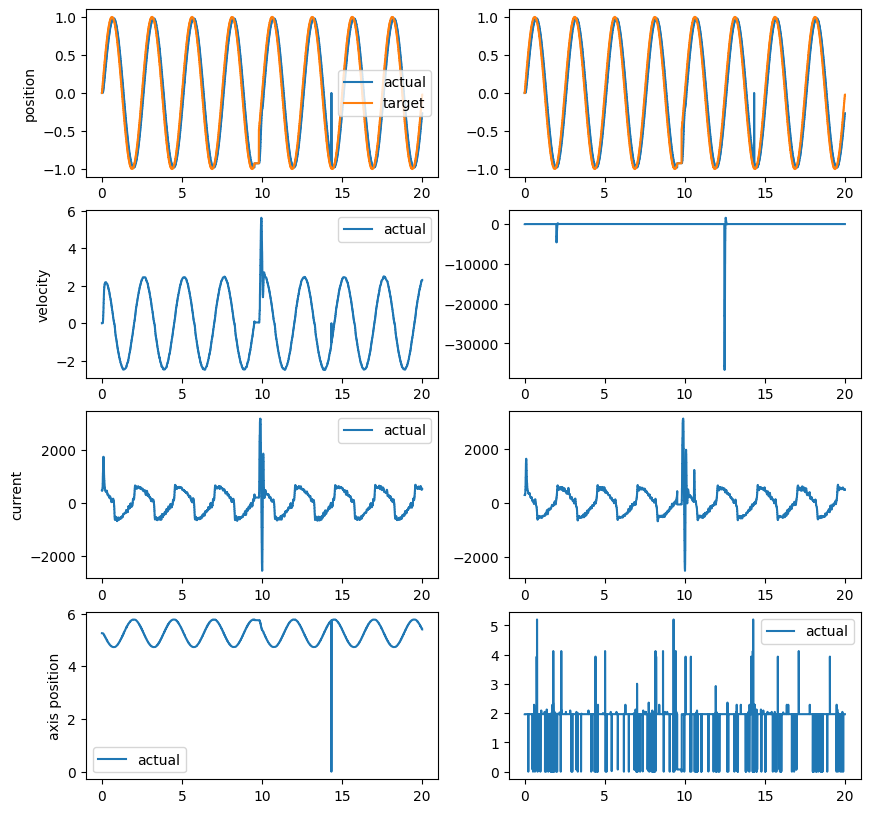

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,n_axis, figsize=(10,10))

for i, a in enumerate(axs.T):
    a[0].step(t,pos[:,i], label="actual")
    a[0].step(t,tar[:,i], label="target")    
    a[1].step(t,vel[:,i], label = "actual")
    a[2].step(t,torque[:,i], label = "actual")
    a[3].step(t, axis_sensors[:,i], label = "actual")

for i, a in enumerate(axs[:].T):
    a[0].set_ylabel("position")
    a[0].legend()
    a[1].set_ylabel("velocity")
    a[1].legend()
    a[2].set_ylabel("current")
    a[2].legend()
    a[3].set_ylabel("axis position")
    a[3].legend()
    break

plt.legend()

loop times 
mean 1.4612271366883216 ms, 
max: 262.21251487731934 ms, 
min 1.1615753173828125 ms


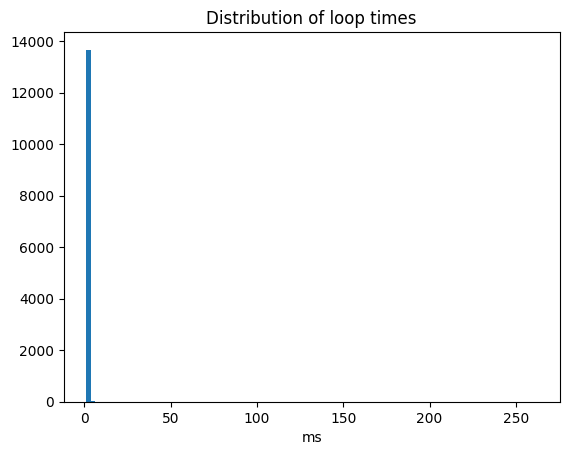

thread 'tokio-runtime-worker' panicked at poulpe_ethercat_grpc/src/client.rs:87:67:
called `Result::unwrap()` on an `Err` value: Status { code: Unknown, message: "error reading a body from connection: stream closed because of a broken pipe", source: Some(hyper::Error(Body, Error { kind: Io(Custom { kind: BrokenPipe, error: "stream closed because of a broken pipe" }) })) }


In [45]:
dt = np.diff(t)*1000
plt.figure()
plt.hist(dt,100);
plt.xlabel("ms")
plt.title("Distribution of loop times")
print(f"loop times \nmean {dt.mean()} ms, \nmax: {dt.max()} ms, \nmin {dt.min()} ms")